In [263]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
#RateBeer and Beer Advocate matched website data :

df_beer = pd.read_csv("matched_beer_data/beers.csv", header=1)
df_breweries  = pd.read_csv("matched_beer_data/breweries.csv", header=1)
df_users = pd.read_csv("matched_beer_data/users.csv", header=1)
df_rating = pd.read_csv("matched_beer_data/ratings.csv", header=1)
df_users_approx = pd.read_csv("matched_beer_data/users_approx.csv", header=1)

#Display all columns
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')


**IMPORTING NEW DATASET ABOUT LOCATIONS'SUPERFICY**

In [265]:
import requests
from bs4 import BeautifulSoup

In [266]:
#wikipedia dataset for states (US) superficies
wiki_url_4usa = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area'
#Get the html of the pages
response_us = requests.get(wiki_url_4usa)
soup_us = BeautifulSoup(response_us.text,'lxml')

#Find the useful table from in the html and convert it into pandas df 
superficies_list_us = soup_us.find('table', attrs={'class':"wikitable"})
df_superficies_us = pd.read_html(str(superficies_list_us), header=1)[0]

#Clean the datafram
df_superficies_us = df_superficies_us[['State', 'km2']] #Keep only the columns we need
df_superficies_us['State'] = 'United States, ' + df_superficies_us['State'] #add the country name to be consistent with the other dataset
df_superficies_us = df_superficies_us.rename(columns={'State': 'location'}) #rename the column
df_superficies_us = df_superficies_us[:-3] #remove the last 3 rows (not states)

#_______________________________________________________________________________________________________________________

#wikipedia dataset for country superficies
wiki_url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area'

#Get the html of the pages
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text,'lxml')

#Find the useful table from in the html and convert it into pandas df 
superficies_list = soup.find('table',attrs={'class':"wikitable"})
df_superficies = pd.read_html(str(superficies_list))[0]

#Keep only the columns we need and clean them
df_superficies = df_superficies[['Country / dependency', 'Total in km2 (mi2)']]
df_superficies['Total in km2 (mi2)'] = df_superficies['Total in km2 (mi2)'].str.replace(',', '') #remove the comma
df_superficies['Total in km2 (mi2)'] = df_superficies['Total in km2 (mi2)'].str.split(' ').str[0]  #remove the text in parenthesis
df_superficies.rename(columns={'Country / dependency':'location', 'Total in km2 (mi2)':'km2'}, inplace=True) #rename the columns
df_superficies['location'] = df_superficies['location'].str.replace(r'\s*\([^)]*\)', '', regex=True)  #Remove all parenthesis and text inside in the location (ex : remove (China) in 'Hong Kong (China)')

#Change the name of the country to be consistent with the other dataset
df_superficies[df_superficies['location'] == 'Slovakia'] = 'Slovak Republic'
df_superficies[df_superficies['location'] == 'North Macedonia'] = 'Macedonia'
df_superficies[df_superficies['location'] == 'Trinidad and Tobago'] = 'Trinidad & Tobago'



#_______________________________________________________________________________________________________________________

#Dataset for UK coutries superficies to be consistent with the other dataset (breweries and beers)
df_superficies_uk = pd.DataFrame({'location': ['England', 'Scotland', 'Wales', 'Northern Ireland'], 
                                  'km2': [130279, 78772, 20779, 14130]}) #create the dataframe (small so easy to do it manually)

#_______________________________________________________________________________________________________________________

print(np.shape(df_superficies_us))
print(np.shape(df_superficies)) 
print(np.shape(df_superficies_uk))

#Merging the two first dataframe 
df_superficies_temp = pd.concat([df_superficies, df_superficies_us]) #concatenate the two dataframe
print(np.shape(df_superficies_temp))

#Merging the dataframes with the UK dataframe
df_superficies_tot = pd.concat([df_superficies_temp, df_superficies_uk])
print(np.shape(df_superficies_tot))

C:\Users\nicol\AppData\Local\Temp\ipykernel_22348\721757531.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_superficies_us = pd.read_html(str(superficies_list_us), header=1)[0]


(57, 2)
(266, 2)
(4, 2)
(323, 2)
(327, 2)


C:\Users\nicol\AppData\Local\Temp\ipykernel_22348\721757531.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_superficies = pd.read_html(str(superficies_list))[0]


In [267]:
#Test to visualize the data
df_beer

,abv,avg,avg_computed,avg_matched_valid_ratings,ba_score,beer_id,beer_name,beer_wout_brewery_name,brewery_id,brewery_name,bros_score,nbr_matched_valid_ratings,nbr_ratings,nbr_reviews,style,zscore,abv.1,avg.1,avg_computed.1,avg_matched_valid_ratings.1,beer_id.1,beer_name.1,beer_wout_brewery_name.1,brewery_id.1,brewery_name.1,nbr_matched_valid_ratings.1,nbr_ratings.1,overall_score,style.1,style_score,zscore.1,diff,sim
0,4.8,3.45,3.439867,3.504068,80.0,19827,Legbiter,Legbiter,10093,Strangford Lough Brewing Company Ltd,80.0,59,75,59,English Pale Ale,-0.649167,4.8,2.79,2.923596,2.923596,37923,Strangford Lough Legbiter,Legbiter,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.698304,1.000000,1.0
1,6.0,3.86,3.888750,3.768333,NaN,20841,St. Patrick's Ale,Patricks Ale St,10093,Strangford Lough Brewing Company Ltd,NaN,6,8,6,English Pale Ale,0.093110,6.0,3.10,3.290909,3.290909,41286,Strangford Lough St. Patricks Ale,Patricks Ale St,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754,0.527141,1.0
2,4.2,3.56,3.556094,3.580417,82.0,20842,St. Patrick's Best,Patricks Best St,10093,Strangford Lough Brewing Company Ltd,90.0,48,64,48,English Bitter,-0.478579,4.2,2.82,2.831081,2.831081,41287,Strangford Lough St. Patricks Best,Patricks Best St,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.862119,0.527141,1.0
3,4.8,3.96,3.960000,3.960000,NaN,22659,St. Patrick's Gold,Patricks Gold St,10093,Strangford Lough Brewing Company Ltd,NaN,1,1,1,American Pale Wheat Ale,0.262870,4.8,2.76,2.775000,2.775000,41285,Strangford Lough St. Patricks Gold,Patricks Gold St,4959,Strangford Lough,4,4,NaN,Amber Ale,NaN,-0.758491,0.527141,1.0
4,4.5,NaN,NaN,NaN,NaN,178681,Sheelin Stout,Stout,32848,The Sheelin Brewery,NaN,0,0,0,Irish Dry Stout,NaN,4.5,2.86,3.200000,3.200000,230283,Sheelin Stout,Stout,17616,Sheelin,2,2,NaN,Mild Ale,NaN,-0.347271,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45635,6.4,3.24,3.240000,3.236667,NaN,96911,Pale Ale,Pale Ale,32205,Do Can Brewery,NaN,3,4,3,English Pale Ale,-1.099528,6.4,2.86,3.500000,3.500000,242782,Do Can Pale Ale,Pale Ale,18345,Do Can Brewery,1,1,NaN,India Pale Ale (IPA),NaN,0.161214,1.000000,1.0
45636,5.1,3.30,3.260000,3.248571,81.0,37457,Mustang Gold Ale,Ale Gold Mustang,10673,Warbird Brewing Company,NaN,21,22,21,American Blonde Ale,-0.940805,5.1,2.56,2.535088,2.535088,68764,Warbird Mustang Gold Ale,Ale Gold Mustang,5358,Warbird Brewing Company,57,57,21.0,Golden Ale/Blond Ale,18.0,-1.227920,0.806680,1.0
45637,6.0,3.54,3.545000,3.550000,83.0,47287,Shanty Irish,Irish Shanty,10673,Warbird Brewing Company,NaN,9,10,9,Irish Red Ale,-0.488225,6.0,3.03,3.096000,3.096000,76984,Warbird Shanty Irish,Irish Shanty,5358,Warbird Brewing Company,50,50,48.0,Irish Ale,57.0,-0.357975,1.000000,1.0
45638,6.0,3.56,3.664762,3.698000,83.0,37177,Thunderbolt Wheat,Wheat Thunderbolt,10673,Warbird Brewing Company,NaN,20,21,20,Hefeweizen,-0.229246,6.0,2.98,3.003390,3.003390,78298,Warbird Thunderbolt Wheat,Wheat Thunderbolt,5358,Warbird Brewing Company,59,59,44.0,German Hefeweizen,50.0,-0.491306,1.000000,1.0


In [268]:
#I would like to see the id of each column
df_beer.columns

Index(['abv', 'avg', 'avg_computed', 'avg_matched_valid_ratings', 'ba_score',
       'beer_id', 'beer_name', 'beer_wout_brewery_name', 'brewery_id',
       'brewery_name', 'bros_score', 'nbr_matched_valid_ratings',
       'nbr_ratings', 'nbr_reviews', 'style', 'zscore', 'abv.1', 'avg.1',
       'avg_computed.1', 'avg_matched_valid_ratings.1', 'beer_id.1',
       'beer_name.1', 'beer_wout_brewery_name.1', 'brewery_id.1',
       'brewery_name.1', 'nbr_matched_valid_ratings.1', 'nbr_ratings.1',
       'overall_score', 'style.1', 'style_score', 'zscore.1', 'diff', 'sim'],
      dtype='object')

In [269]:
#Test to visualize the data
df_breweries

,id,location,name,nbr_beers,id.1,location.1,name.1,nbr_beers.1,diff,sim
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596
2,40360,Northern Ireland,Walled City Brewing Company,6,24866,Northern Ireland,Walled City,3,0.527852,0.954183
3,40309,Northern Ireland,Ards Brewing Company,7,13538,Northern Ireland,Ards Brewing Co.,13,0.554395,0.896098
4,41205,Northern Ireland,Barrahooley Brewery,3,22304,Northern Ireland,Barrahooley Craft Brewery,4,0.602544,0.896205
...,...,...,...,...,...,...,...,...,...,...
8276,10673,"United States, Indiana",Warbird Brewing Company,6,5358,"United States, Indiana",Warbird Brewing Company,6,0.658297,1.000000
8277,34365,France,Brasserie De La Goutte D'Or,0,16083,France,Goutte dOr,24,0.412731,0.848934
8278,23693,South Africa,Luyt Brewery,0,13836,South Africa,Luyt Brewery,1,0.706339,1.000000
8279,5025,Aruba,Cerbeseria Arubano,0,2409,Aruba,Cerbeseria Arubano,1,1.000000,1.000000


In [270]:
#Merge the two dataframes on the brewery_id column with inner merge to have access to the location of every beer
df_beer_breweries = pd.merge(df_beer, df_breweries, left_on='brewery_id', right_on='id', how='left')
df_beer_breweries



,abv,avg,avg_computed,avg_matched_valid_ratings,ba_score,beer_id,beer_name,beer_wout_brewery_name,brewery_id,brewery_name,bros_score,nbr_matched_valid_ratings,nbr_ratings,nbr_reviews,style,zscore,abv.1,avg.1,avg_computed.1,avg_matched_valid_ratings.1,beer_id.1,beer_name.1,beer_wout_brewery_name.1,brewery_id.1,brewery_name.1,nbr_matched_valid_ratings.1,nbr_ratings.1,overall_score,style.1,style_score,zscore.1,diff_x,sim_x,id,location,name,nbr_beers,id.1,location.1,name.1,nbr_beers.1,diff_y,sim_y
0,4.8,3.45,3.439867,3.504068,80.0,19827,Legbiter,Legbiter,10093,Strangford Lough Brewing Company Ltd,80.0,59,75,59,English Pale Ale,-0.649167,4.8,2.79,2.923596,2.923596,37923,Strangford Lough Legbiter,Legbiter,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.698304,1.000000,1.0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
1,6.0,3.86,3.888750,3.768333,NaN,20841,St. Patrick's Ale,Patricks Ale St,10093,Strangford Lough Brewing Company Ltd,NaN,6,8,6,English Pale Ale,0.093110,6.0,3.10,3.290909,3.290909,41286,Strangford Lough St. Patricks Ale,Patricks Ale St,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754,0.527141,1.0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
2,4.2,3.56,3.556094,3.580417,82.0,20842,St. Patrick's Best,Patricks Best St,10093,Strangford Lough Brewing Company Ltd,90.0,48,64,48,English Bitter,-0.478579,4.2,2.82,2.831081,2.831081,41287,Strangford Lough St. Patricks Best,Patricks Best St,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.862119,0.527141,1.0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
3,4.8,3.96,3.960000,3.960000,NaN,22659,St. Patrick's Gold,Patricks Gold St,10093,Strangford Lough Brewing Company Ltd,NaN,1,1,1,American Pale Wheat Ale,0.262870,4.8,2.76,2.775000,2.775000,41285,Strangford Lough St. Patricks Gold,Patricks Gold St,4959,Strangford Lough,4,4,NaN,Amber Ale,NaN,-0.758491,0.527141,1.0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
4,4.5,NaN,NaN,NaN,NaN,178681,Sheelin Stout,Stout,32848,The Sheelin Brewery,NaN,0,0,0,Irish Dry Stout,NaN,4.5,2.86,3.200000,3.200000,230283,Sheelin Stout,Stout,17616,Sheelin,2,2,NaN,Mild Ale,NaN,-0.347271,1.000000,1.0,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45635,6.4,3.24,3.240000,3.236667,NaN,96911,Pale Ale,Pale Ale,32205,Do Can Brewery,NaN,3,4,3,English Pale Ale,-1.099528,6.4,2.86,3.500000,3.500000,242782,Do Can Pale Ale,Pale Ale,18345,Do Can Brewery,1,1,NaN,India Pale Ale (IPA),NaN,0.161214,1.000000,1.0,32205,"United States, Massachusetts",Do Can Brewery,10,18345,"United States, Massachusetts",Do Can Brewery,9,0.456866,1.000000
45636,5.1,3.30,3.260000,3.248571,81.0,37457,Mustang Gold Ale,Ale Gold Mustang,10673,Warbird Brewing Company,NaN,21,22,21,American Blonde Ale,-0.940805,5.1,2.56,2.535088,2.535088,68764,Warbird Mustang Gold Ale,Ale Gold Mustang,5358,Warbird Brewing Company,57,57,21.0,Golden Ale/Blond Ale,18.0,-1.227920,0.806680,1.0,10673,"United States, Indiana",Warbird Brewing Company,6,5358,"United States, Indiana",Warbird Brewing Company,6,0.658297,1.000000
45637,6.0,3.54,3.545000,3.550000,83.0,47287,Shanty Irish,Irish Shanty,10673,Warbird Brewing Company,NaN,9,10,9,Irish Red Ale,-0.488225,6.0,3.03,3.096000,3.096000,76984,Warbird Shanty Irish,Irish Shanty,5358,Warbird Brewing Company,50,50,48.0,Irish Ale,57.0,-0.357975,1.000000,1.0,10673,"United States, Indiana",Warbird Brewing Company,6,5358,"United States, Indiana",Warbird Brewing Company,6,0.658297,1.000000
45638,6.0,3.56,3.664762,3.698000,83.0,37177,Thunderbolt Wheat,Wheat T

In [271]:
#Clean the dataframe by dropping the columns that are not useful for the analysis
df_beer_breweries_clean = df_beer_breweries.drop(['beer_wout_brewery_name', 'beer_wout_brewery_name.1', 'style','abv.1', 'id', 'id.1', 'name', 'name.1', 'beer_name.1', 'brewery_name.1', 'location.1', 'nbr_beers.1'], axis=1)
df_beer_breweries_clean

#Choose to keep style from RateBeer and drop the style from Beer Advocate (the style from Beer Advocate is too precise)
df_beer_breweries_clean.rename(columns={'style.1':'style'}, inplace=True)
df_beer_breweries_clean


,abv,avg,avg_computed,avg_matched_valid_ratings,ba_score,beer_id,beer_name,brewery_id,brewery_name,bros_score,nbr_matched_valid_ratings,nbr_ratings,nbr_reviews,zscore,avg.1,avg_computed.1,avg_matched_valid_ratings.1,beer_id.1,brewery_id.1,nbr_matched_valid_ratings.1,nbr_ratings.1,overall_score,style,style_score,zscore.1,diff_x,sim_x,location,nbr_beers,diff_y,sim_y
0,4.8,3.45,3.439867,3.504068,80.0,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,80.0,59,75,59,-0.649167,2.79,2.923596,2.923596,37923,4959,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.698304,1.000000,1.0,Northern Ireland,5,0.431275,0.889062
1,6.0,3.86,3.888750,3.768333,NaN,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,NaN,6,8,6,0.093110,3.10,3.290909,3.290909,41286,4959,11,11,52.0,Irish Ale,79.0,0.005754,0.527141,1.0,Northern Ireland,5,0.431275,0.889062
2,4.2,3.56,3.556094,3.580417,82.0,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,90.0,48,64,48,-0.478579,2.82,2.831081,2.831081,41287,4959,74,74,26.0,Bitter,25.0,-0.862119,0.527141,1.0,Northern Ireland,5,0.431275,0.889062
3,4.8,3.96,3.960000,3.960000,NaN,22659,St. Patrick's Gold,10093,Strangford Lough Brewing Company Ltd,NaN,1,1,1,0.262870,2.76,2.775000,2.775000,41285,4959,4,4,NaN,Amber Ale,NaN,-0.758491,0.527141,1.0,Northern Ireland,5,0.431275,0.889062
4,4.5,NaN,NaN,NaN,NaN,178681,Sheelin Stout,32848,The Sheelin Brewery,NaN,0,0,0,NaN,2.86,3.200000,3.200000,230283,17616,2,2,NaN,Mild Ale,NaN,-0.347271,1.000000,1.0,Northern Ireland,4,0.526388,0.863596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45635,6.4,3.24,3.240000,3.236667,NaN,96911,Pale Ale,32205,Do Can Brewery,NaN,3,4,3,-1.099528,2.86,3.500000,3.500000,242782,18345,1,1,NaN,India Pale Ale (IPA),NaN,0.161214,1.000000,1.0,"United States, Massachusetts",10,0.456866,1.000000
45636,5.1,3.30,3.260000,3.248571,81.0,37457,Mustang Gold Ale,10673,Warbird Brewing Company,NaN,21,22,21,-0.940805,2.56,2.535088,2.535088,68764,5358,57,57,21.0,Golden Ale/Blond Ale,18.0,-1.227920,0.806680,1.0,"United States, Indiana",6,0.658297,1.000000
45637,6.0,3.54,3.545000,3.550000,83.0,47287,Shanty Irish,10673,Warbird Brewing Company,NaN,9,10,9,-0.488225,3.03,3.096000,3.096000,76984,5358,50,50,48.0,Irish Ale,57.0,-0.357975,1.000000,1.0,"United States, Indiana",6,0.658297,1.000000
45638,6.0,3.56,3.664762,3.698000,83.0,37177,Thunderbolt Wheat,10673,Warbird Brewing Company,NaN,20,21,20,-0.229246,2.98,3.003390,3.003390,78298,5358,59,59,44.0,German Hefeweizen,50.0,-0.491306,1.000000,1.0,"United States, Indiana",6,0.658297,1.000000


**BEER TRIPS RELATIVELY TO THE NUMBER OF BREWERIES PER KM2**

In [284]:
#Merge the dataframe with the superficies dataframe to have access to the superficies of every beer
df_breweries_superficies = pd.merge(df_breweries, df_superficies_tot, on='location', how='left')
df_breweries_superficies

,id,location,name,nbr_beers,id.1,location.1,name.1,nbr_beers.1,diff,sim,km2
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062,14130
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596,14130
2,40360,Northern Ireland,Walled City Brewing Company,6,24866,Northern Ireland,Walled City,3,0.527852,0.954183,14130
3,40309,Northern Ireland,Ards Brewing Company,7,13538,Northern Ireland,Ards Brewing Co.,13,0.554395,0.896098,14130
4,41205,Northern Ireland,Barrahooley Brewery,3,22304,Northern Ireland,Barrahooley Craft Brewery,4,0.602544,0.896205,14130
...,...,...,...,...,...,...,...,...,...,...,...
8530,34365,France,Brasserie De La Goutte D'Or,0,16083,France,Goutte dOr,24,0.412731,0.848934,643801
8531,34365,France,Brasserie De La Goutte D'Or,0,16083,France,Goutte dOr,24,0.412731,0.848934,543940
8532,23693,South Africa,Luyt Brewery,0,13836,South Africa,Luyt Brewery,1,0.706339,1.000000,1221037
8533,5025,Aruba,Cerbeseria Arubano,0,2409,Aruba,Cerbeseria Arubano,1,1.000000,1.000000,180


**BEER TRIPS RELATIVELY TO THE PERCENTAGE OF ALCOHOL**

In [273]:
#Controling the number of null values in the abv column
df_beer_breweries_clean.abv.isnull().sum()

#Drop the location with less than 5 beers (to do a beer trip, we need to have different beer to drink!)
df_beer_breweries_flt_abv = df_beer_breweries_clean.groupby('location').filter(lambda x: len(x) >= 5)

#Summary statistics of the abv column per location
df_beer_breweries_flt_abv.groupby('location').abv.describe()


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Argentina,19.0,5.831579,1.696746,4.00,5.000,5.5,6.000,11.0
Australia,711.0,5.727426,1.728223,2.70,4.600,5.2,6.500,14.6
Austria,142.0,5.647606,2.028092,0.38,4.900,5.2,6.300,14.0
Bahamas,6.0,5.133333,1.777264,2.30,4.450,5.4,5.825,7.6
Belgium,863.0,7.115435,2.328768,0.50,6.000,7.0,8.000,39.0
...,...,...,...,...,...,...,...,...
"United States, Wisconsin",520.0,6.284712,1.592394,3.20,5.200,6.0,7.025,12.0
"United States, Wyoming",145.0,6.445172,1.812144,4.00,5.000,6.0,7.500,12.5
Uzbekistan,12.0,4.475000,0.601702,3.40,4.225,4.4,5.000,5.4


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Trinidad & Tobago,8.0,3.525000,1.971765,1.2,1.200,4.45,5.050,5.5
Jersey,5.0,4.100000,0.264575,3.7,4.000,4.20,4.200,4.4
Uzbekistan,12.0,4.475000,0.601702,3.4,4.225,4.40,5.000,5.4
Cyprus,9.0,4.700000,0.600000,3.8,4.500,4.50,5.000,6.0
Malta,16.0,4.737500,1.547417,2.2,3.875,4.45,5.550,8.0
Georgia,5.0,4.760000,0.427785,4.0,4.900,4.90,5.000,5.0
Taiwan,12.0,4.866667,0.595946,4.0,4.450,4.95,5.500,5.6
Moldova,11.0,4.890909,2.461891,1.2,4.100,5.00,5.650,10.0
Colombia,7.0,4.914286,0.195180,4.6,4.800,5.00,5.000,5.2


Index(['Trinidad & Tobago', 'Jersey', 'Uzbekistan', 'Cyprus', 'Malta',
       'Georgia', 'Taiwan', 'Moldova', 'Colombia', 'Turkey'],
      dtype='object', name='location')

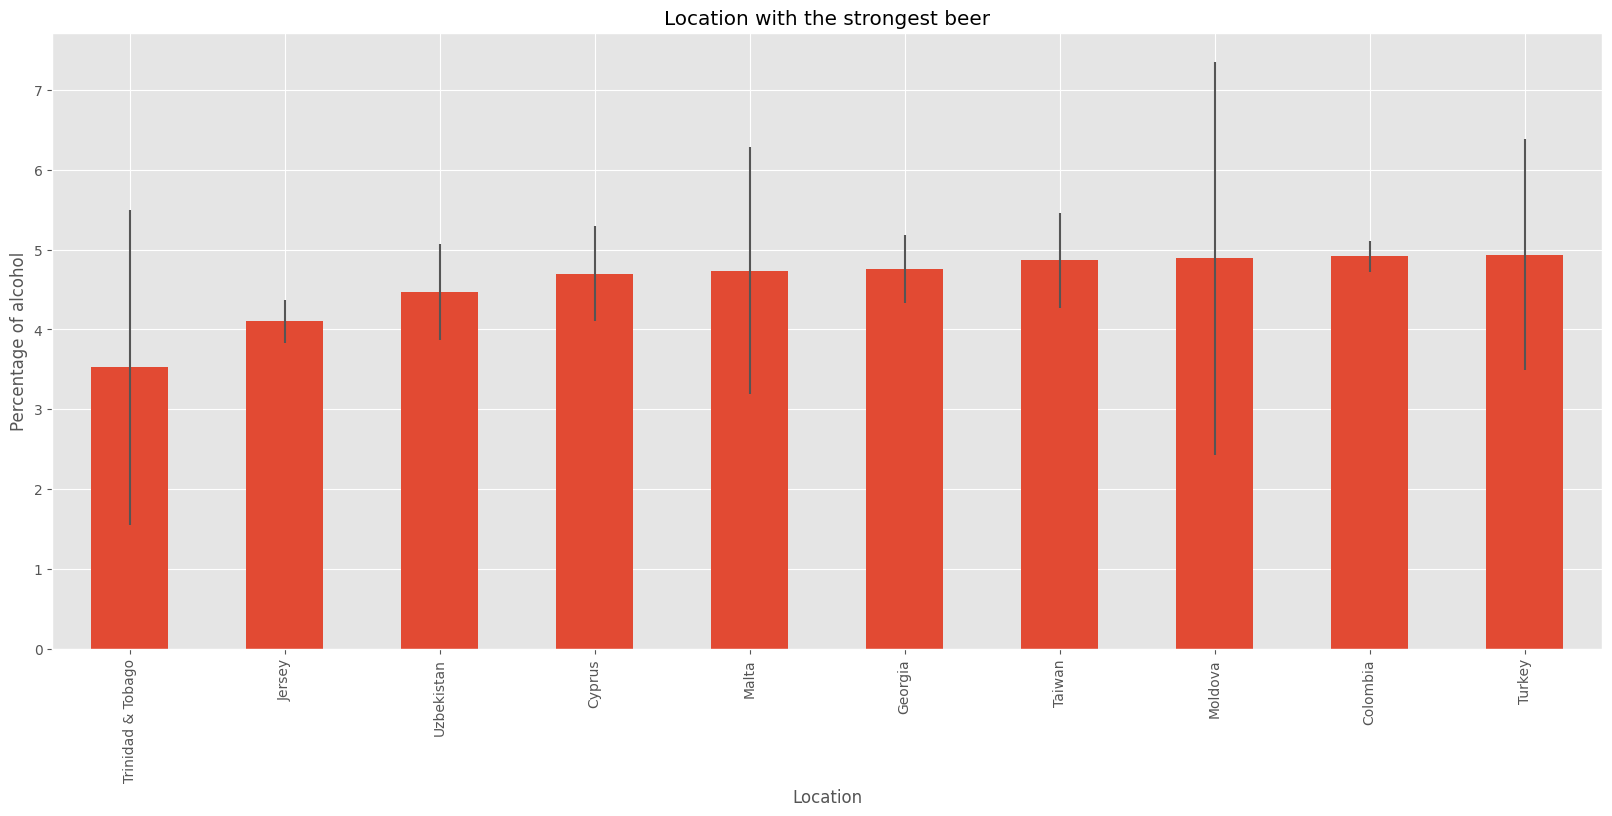

In [274]:
#Sort the dataframe by considering the 10 location with the softest beer
avg_rating_location = df_beer_breweries_flt_abv.groupby('location').abv.describe()
avg_rating_location.sort_values(by='mean', ascending=True, inplace=True)
top_ten_abv_soft = avg_rating_location.head(10)
display(top_ten_abv_soft)


#Plot the result with standard deviation as error bar
pl = top_ten_abv_soft['mean'].plot(kind='bar', figsize=[20,8], rot=0, yerr=top_ten_abv_soft['std']) #mieux de faire avec CI ?????
pl.set_title('Location with the strongest beer')
pl.set_ylabel('Percentage of alcohol')
pl.set_xlabel('Location')
pl.set_xticklabels(top_ten_abv_soft.index, rotation=90)

#Keep a copy the ranking 
top_ten_abv_only_location = top_ten_abv_soft.index 
top_ten_abv_only_location

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Estonia,69.0,7.482609,2.704080,3.8,5.500,6.90,8.900,16.0
Belgium,863.0,7.115435,2.328768,0.5,6.000,7.00,8.000,39.0
Iceland,45.0,7.108889,2.644619,4.0,5.200,6.00,9.000,14.5
"United States, Rhode Island",143.0,7.013566,2.198081,2.5,5.500,6.60,8.000,12.5
Netherlands,569.0,7.005290,2.022058,0.5,5.600,6.60,8.200,20.0
"United States, Oklahoma",90.0,6.880000,2.655933,3.7,5.075,6.25,8.000,17.0
"United States, Georgia",461.0,6.852278,1.906642,3.0,5.300,6.50,8.100,13.9
Mauritius,12.0,6.825000,2.100271,4.8,5.600,6.20,7.375,12.0
"United States, California",4314.0,6.785767,1.889064,2.5,5.500,6.50,7.700,17.0


Index(['Estonia', 'Belgium', 'Iceland', 'United States, Rhode Island',
       'Netherlands', 'United States, Oklahoma', 'United States, Georgia',
       'Mauritius', 'United States, California', 'Myanmar'],
      dtype='object', name='location')

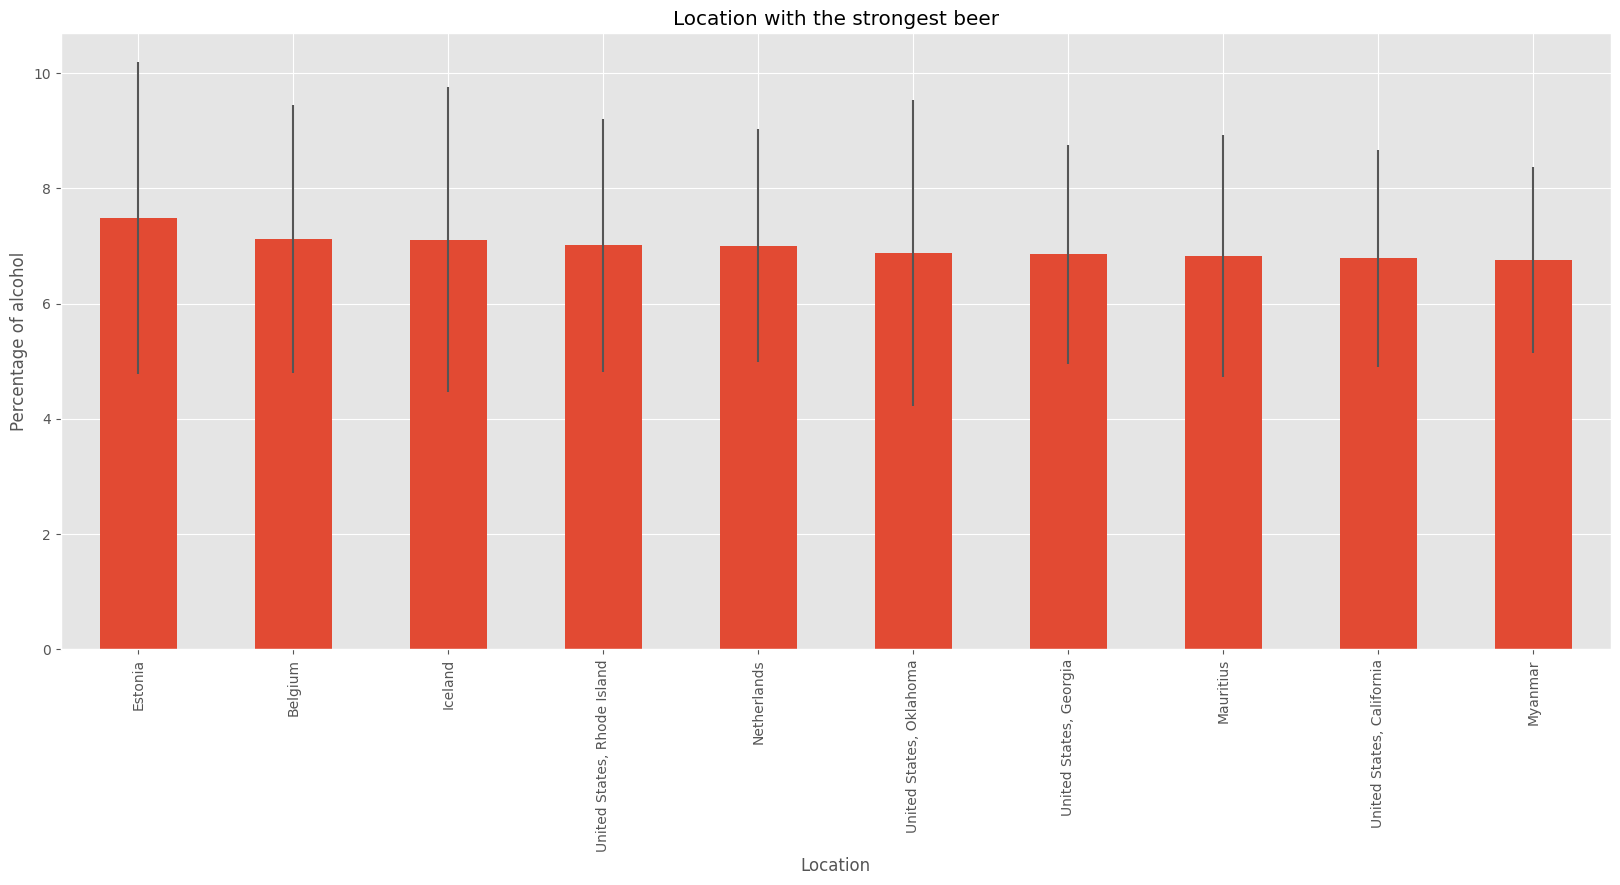

In [275]:
#Sort the dataframe by considering the 10 location with the strongest beer
avg_rating_location = df_beer_breweries_flt_abv.groupby('location').abv.describe()
avg_rating_location.sort_values(by='mean', ascending=False, inplace=True)
top_ten_abv_strong = avg_rating_location.head(10)
display(top_ten_abv_strong)


#Plot the result with standard deviation as error bar
pl = top_ten_abv_strong['mean'].plot(kind='bar', figsize=[20,8], rot=0, yerr=top_ten_abv_strong['std']) #mieux de faire avec CI ?????
pl.set_title('Location with the strongest beer')
pl.set_ylabel('Percentage of alcohol')
pl.set_xlabel('Location')
pl.set_xticklabels(top_ten_abv_strong.index, rotation=90)

#Keep a copy the ranking 
top_ten_abv_only_location = top_ten_abv_strong.index 
top_ten_abv_only_location

**BEER TRIPS RELATIVELY TO THE RATINGS**

In [276]:
#Select only the beers with at least 5 ratings on each sites and drop the beers with no score in either sites : 
df_beer_breweries_clean_5_plus = df_beer_breweries_clean[(df_beer_breweries_clean['nbr_ratings'] >=5) & (df_beer_breweries_clean['nbr_ratings.1'] >=5)]


(125, 30)


[Text(0, 0, 'Argentina'),
 Text(1, 0, 'Australia'),
 Text(2, 0, 'Austria'),
 Text(3, 0, 'Bahamas'),
 Text(4, 0, 'Belgium'),
 Text(5, 0, 'Brazil'),
 Text(6, 0, 'Bulgaria'),
 Text(7, 0, 'Cambodia'),
 Text(8, 0, 'Canada'),
 Text(9, 0, 'Cape Verde Islands'),
 Text(10, 0, 'Cayman Islands'),
 Text(11, 0, 'Chile'),
 Text(12, 0, 'China'),
 Text(13, 0, 'Colombia'),
 Text(14, 0, 'Costa Rica'),
 Text(15, 0, 'Croatia'),
 Text(16, 0, 'Cyprus'),
 Text(17, 0, 'Czech Republic'),
 Text(18, 0, 'Denmark'),
 Text(19, 0, 'England'),
 Text(20, 0, 'Eritrea'),
 Text(21, 0, 'Estonia'),
 Text(22, 0, 'Faroe Islands'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'France'),
 Text(25, 0, 'French Polynesia'),
 Text(26, 0, 'Germany'),
 Text(27, 0, 'Ghana'),
 Text(28, 0, 'Greece'),
 Text(29, 0, 'Guatemala'),
 Text(30, 0, 'Hong Kong'),
 Text(31, 0, 'Hungary'),
 Text(32, 0, 'Iceland'),
 Text(33, 0, 'India'),
 Text(34, 0, 'Ireland'),
 Text(35, 0, 'Israel'),
 Text(36, 0, 'Italy'),
 Text(37, 0, 'Japan'),
 Text(38, 0, 'Laos'),
 T

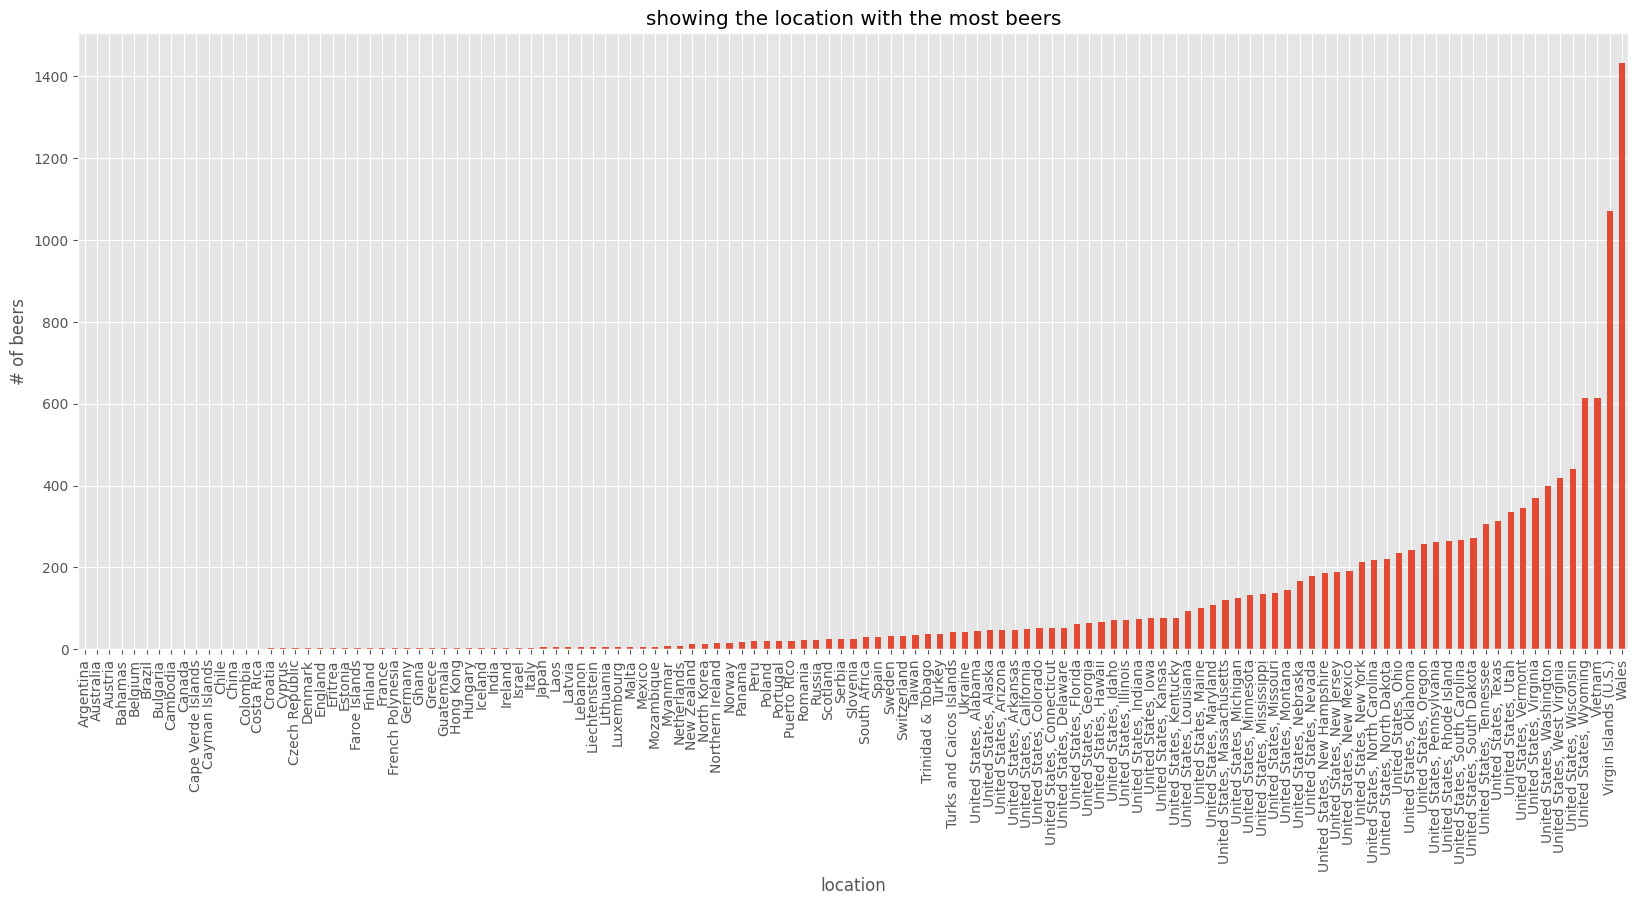

In [277]:
#Grouped the beers by location and count the number of beers in each location
df_beer_breweries_clean_5_plus_4plot = df_beer_breweries_clean_5_plus.groupby(['location']).count()
print(np.shape(df_beer_breweries_clean_5_plus_4plot))

#Plot the location with the most beers with at least 5 ratings on each sites
pl = df_beer_breweries_clean_5_plus_4plot['beer_name'].sort_values(ascending=True).plot(kind='bar', figsize=[20,8], rot=0)
pl.set_title('showing the location with the most beers')
pl.set_ylabel('# of beers')
pl.set_xlabel('location')
pl.set_xticklabels(df_beer_breweries_clean_5_plus_4plot.index, rotation=90)


In [278]:
#We can see on the previous graph that we would still have a lot of location to visit

#Drop the beers with no score in either sites
df_beer_breweries_clean_5_plus = df_beer_breweries_clean_5_plus.drop(df_beer_breweries_clean_5_plus[(df_beer_breweries_clean_5_plus['ba_score'].isna()) | (df_beer_breweries_clean_5_plus['overall_score'].isna())].index)

#Drop the location with less than 5 beers (to do a beer trip, we need to have different beer to drink!)
df_beer_breweries_flt = df_beer_breweries_clean_5_plus.groupby('location').filter(lambda x: len(x) >= 5)


In [279]:
#We still have 78 destinations for our trip. It is a good number to start with! Now lets analysis the data relatively to some features

#Analyse the beers'average rating on the two website and plot the result
#New columns
df_beer_breweries_flt['average_rating'] = (df_beer_breweries_flt['ba_score'] + df_beer_breweries_flt['overall_score'])/2
df_beer_breweries_flt.groupby('location').average_rating.describe()



,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Australia,105.0,68.876190,15.225671,38.5,58.500,66.00,84.500,94.0
Austria,29.0,69.206897,16.644131,43.5,53.500,66.00,86.000,93.0
Bahamas,5.0,46.000000,11.208256,37.0,41.000,42.50,44.000,65.5
Belgium,309.0,79.854369,14.198665,35.0,69.500,84.00,91.500,100.0
Brazil,14.0,80.357143,14.486637,44.5,74.625,87.50,90.875,92.0
...,...,...,...,...,...,...,...,...
"United States, Washington",138.0,75.365942,11.902821,45.0,66.000,77.25,85.375,100.0
"United States, West Virginia",13.0,69.961538,12.707382,54.0,57.500,69.00,81.500,89.0
"United States, Wisconsin",142.0,68.042254,16.366426,34.0,55.500,66.00,83.125,97.0


In [280]:
df_beer_breweries_flt.groupby('location').average_rating.describe().head(50)


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Australia,105.0,68.876190,15.225671,38.5,58.500,66.00,84.500,94.0
Austria,29.0,69.206897,16.644131,43.5,53.500,66.00,86.000,93.0
Bahamas,5.0,46.000000,11.208256,37.0,41.000,42.50,44.000,65.5
Belgium,309.0,79.854369,14.198665,35.0,69.500,84.00,91.500,100.0
Brazil,14.0,80.357143,14.486637,44.5,74.625,87.50,90.875,92.0
Canada,628.0,72.938694,14.041087,33.5,62.500,73.50,86.000,97.0
Denmark,86.0,87.703488,6.037811,56.0,86.500,89.50,91.000,95.0
England,131.0,80.858779,12.412350,45.0,72.000,86.00,90.500,96.5
Estonia,11.0,90.409091,3.292554,81.5,89.750,91.00,92.250,93.5


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Estonia,11.0,90.409091,3.292554,81.5,89.750,91.00,92.25,93.5
Denmark,86.0,87.703488,6.037811,56.0,86.500,89.50,91.00,95.0
"United States, Maine",128.0,86.285156,11.237536,48.0,83.500,89.75,94.00,100.0
"United States, Vermont",152.0,85.180921,13.134625,43.5,77.375,90.50,95.50,100.0
Poland,6.0,84.583333,14.776389,54.5,89.125,91.00,91.00,91.5
"United States, California",805.0,84.091304,10.866618,37.0,79.000,87.50,92.00,100.0
New Zealand,23.0,82.782609,10.216771,60.0,75.500,88.00,91.25,92.5
"United States, Illinois",322.0,81.920807,10.062458,52.0,76.000,84.75,89.50,98.0
"United States, Georgia",131.0,81.812977,9.036536,59.5,76.000,83.50,89.50,96.0


Index(['Estonia', 'Denmark', 'United States, Maine', 'United States, Vermont',
       'Poland', 'United States, California', 'New Zealand',
       'United States, Illinois', 'United States, Georgia',
       'United States, Alaska'],
      dtype='object', name='location')

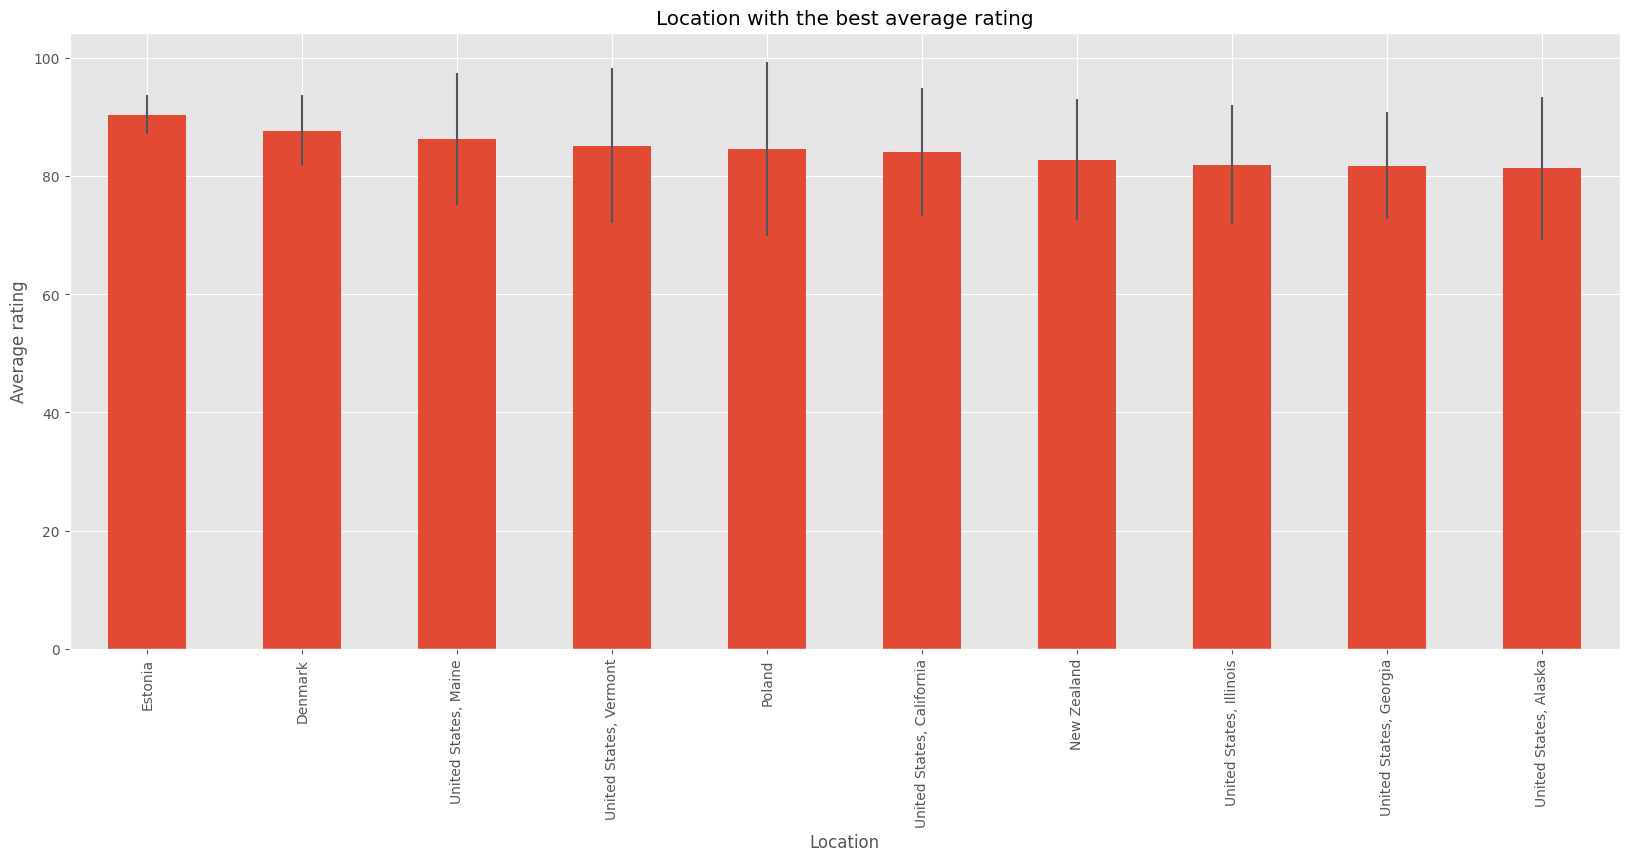

In [281]:
#Sort the dataframe by considering the 10 location with the best average rating
avg_rating_location = df_beer_breweries_flt.groupby('location').average_rating.describe()
avg_rating_location.sort_values(by='mean', ascending=False, inplace=True)
top_ten_best = avg_rating_location.head(10)
display(top_ten_best)


#Plot the result with stndard deviation as error bar
pl = top_ten_best['mean'].plot(kind='bar', figsize=[20,8], rot=0, yerr=top_ten_best['std'])
pl.set_title('Location with the best average rating')
pl.set_ylabel('Average rating')
pl.set_xlabel('Location')
pl.set_xticklabels(top_ten_best.index, rotation=90)

#Keep a copy the ranking 
top_ten_only_location = top_ten_best.index 
top_ten_only_location


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Bahamas,5.0,46.000000,11.208256,37.0,41.000,42.50,44.000,65.5
Trinidad & Tobago,5.0,48.500000,23.590252,34.5,37.500,39.50,40.500,90.5
Spain,13.0,54.730769,15.025832,38.0,42.000,49.00,65.500,82.5
Greece,5.0,55.500000,12.830627,41.0,42.000,63.50,64.500,66.5
"United States, Delaware",5.0,61.600000,12.506998,47.5,55.000,56.00,73.000,76.5
Mexico,11.0,62.545455,10.722534,45.5,57.000,64.50,65.000,88.0
Japan,13.0,64.076923,17.267318,43.0,50.000,59.00,81.500,91.0
"United States, Arkansas",12.0,65.833333,10.025724,44.5,62.500,64.75,71.625,84.0
Germany,144.0,67.020833,14.000609,38.0,56.500,64.75,78.500,97.0


Index(['Bahamas', 'Trinidad & Tobago', 'Spain', 'Greece',
       'United States, Delaware', 'Mexico', 'Japan', 'United States, Arkansas',
       'Germany', 'United States, Nevada'],
      dtype='object', name='location')

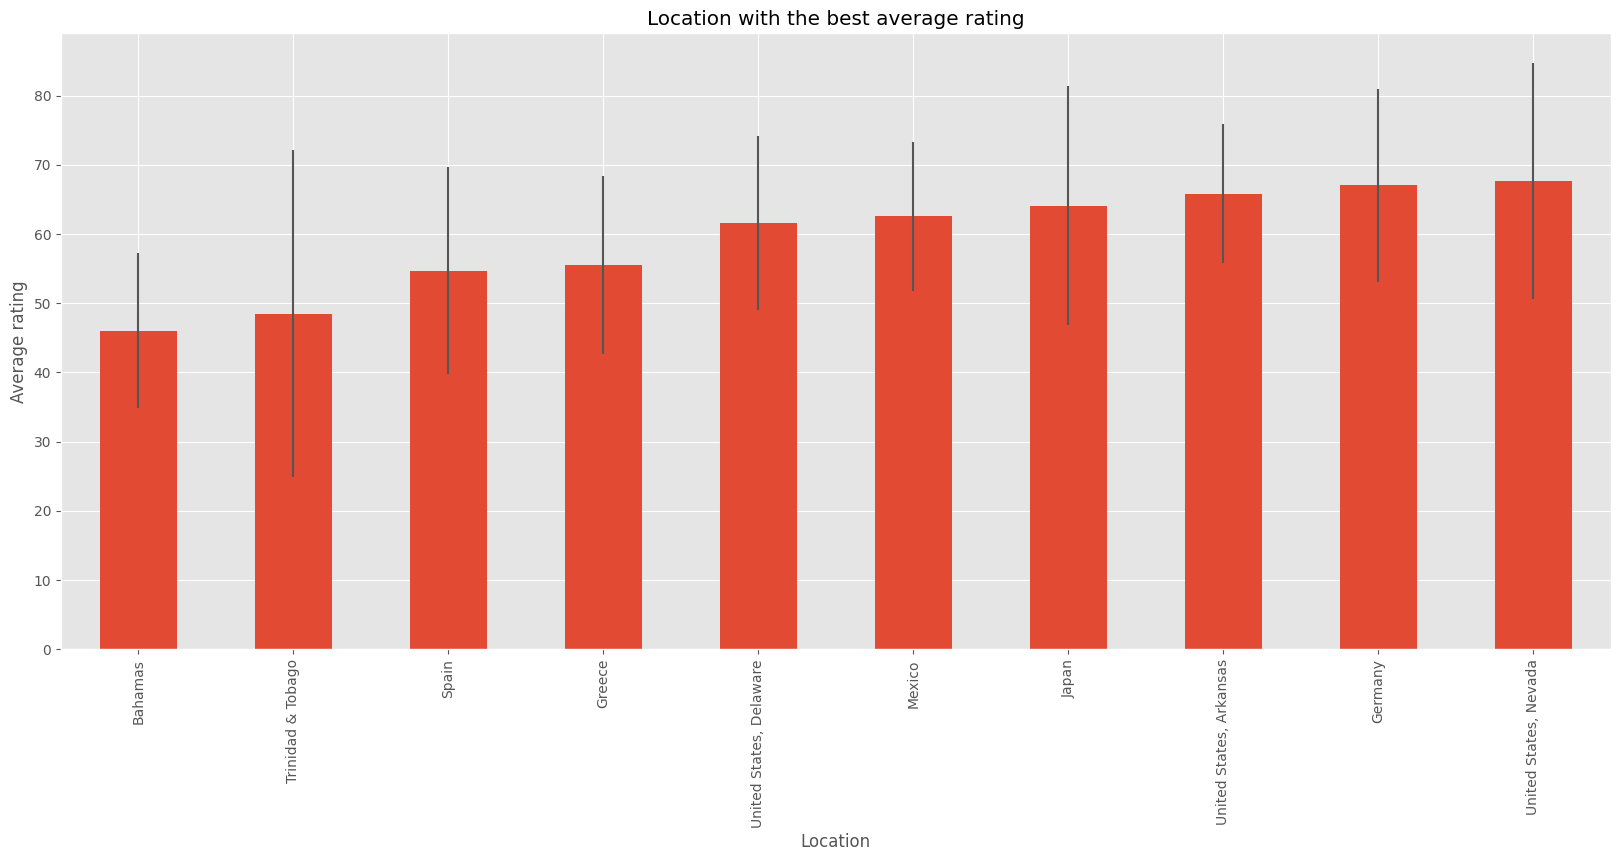

In [282]:
#Sorted the location considering the 10 location with the worst average rating and plot the result
avg_rating_location = df_beer_breweries_flt.groupby('location').average_rating.describe()
avg_rating_location.sort_values(by='mean', ascending=True, inplace=True)
top_ten_worst = avg_rating_location.head(10)
display(top_ten_worst)


#Plot the result with stndard deviation as error bar
pl = top_ten_worst['mean'].plot(kind='bar', figsize=[20,8], rot=0, yerr=top_ten_worst['std'])
pl.set_title('Location with the best average rating')
pl.set_ylabel('Average rating')
pl.set_xlabel('Location')
pl.set_xticklabels(top_ten_worst.index, rotation=90)

#Keep a copy the ranking 
top_ten_only_location = top_ten_worst.index 
top_ten_only_location